# Data Cleaning

In [128]:
#importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [64]:
#importing the dataset
UCI = pd.read_excel(r"C:\Users\admin\OneDrive\Desktop\seminar\Online Retail.xlsx",header=0)
UCI

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [65]:
#to check missing values
UCI.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [69]:
# Remove customers without ID
UCI = UCI.dropna(subset=['CustomerID'])

# Fill missing descriptions
UCI['Description'] = UCI['Description'].fillna("Unknown")

In [71]:
UCI.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [73]:
# to check datatype
UCI.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [75]:
UCI = UCI.dropna(subset=['CustomerID'])
UCI['CustomerID'] = UCI['CustomerID'].astype(int)
UCI['Country'] = UCI['Country'].astype('category')
UCI['StockCode'] = UCI['StockCode'].astype('category')

In [77]:
UCI.dtypes

InvoiceNo              object
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country              category
dtype: object

In [79]:
# to check unique values
pd.reset_option('display.max_seq_items')

for i in UCI.columns :
    print(i,':','\n',UCI[i].unique(),'\n')

InvoiceNo : 
 [536365 536366 536367 ... 581585 581586 581587] 

StockCode : 
 ['85123A', 71053, '84406B', '84029G', '84029E', ..., '90214U', '90214W', '90214Z', 90089, 23843]
Length: 3684
Categories (3684, object): [10002, 10080, 10120, 10125, ..., 'DOT', 'M', 'PADS', 'POST'] 

Description : 
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE'] 

Quantity : 
 [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     72    200    600
    480     -6     14     -2     -4     -5     -7     -3     11     70
    252     60    216    384     27    108     52  -9360     75    270
     42    240     90    320     17   1824    204     69    -36 

In [81]:
# Remove cancelled invoices
UCI = UCI[~UCI['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative or zero quantities
UCI = UCI[UCI['Quantity'] > 0]

In [83]:
print(UCI.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  


In [95]:
UCI['TotalAmount'] = UCI['Quantity'] * UCI['UnitPrice']

In [99]:
print(UCI.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')


# RFM Analysis
### R → Recency (How recently customer purchased)
### F → Frequency (How often customer purchased)
### M → Monetary (How much money customer spent)

In [89]:
snapshot_date = UCI['InvoiceDate'].max() + dt.timedelta(days=1)

In [107]:
rfm = UCI.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

#### Why reversed?Because: Low recency (recent purchase) = best → score 5

In [109]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 
                         q=5, 
                         labels=[5,4,3,2,1])


In [111]:
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 
                         q=5, 
                         labels=[1,2,3,4,5])

In [113]:
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 
                         q=5, 
                         labels=[1,2,3,4,5])

In [117]:
#combining these scores
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,326,1,77183.60,1,1,5,115
1,12347,2,7,4310.00,5,5,5,555
2,12348,75,4,1797.24,2,4,4,244
3,12349,19,1,1757.55,4,1,4,414
4,12350,310,1,334.40,1,1,2,112


In [119]:
#converting scores into integers
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

In [121]:
def segment_customer(row):
    
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'
    
    elif row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Loyal Customers'
    
    elif row['R_Score'] >= 4 and row['F_Score'] <= 2:
        return 'New Customers'
    
    elif row['R_Score'] <= 2 and row['F_Score'] >= 4:
        return 'At Risk'
    
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'Lost Customers'
    
    else:
        return 'Regular Customers'

In [123]:
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [125]:
rfm['Segment'].value_counts()

Segment
Regular Customers    1481
Lost Customers       1065
Champions             962
Loyal Customers       401
New Customers         320
At Risk               110
Name: count, dtype: int64

# RFM Visualization

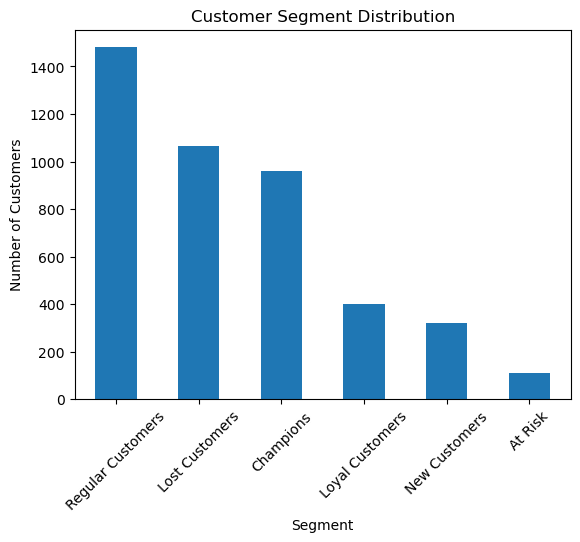

In [130]:
#Segment Distribution
rfm['Segment'].value_counts().plot(kind='bar')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


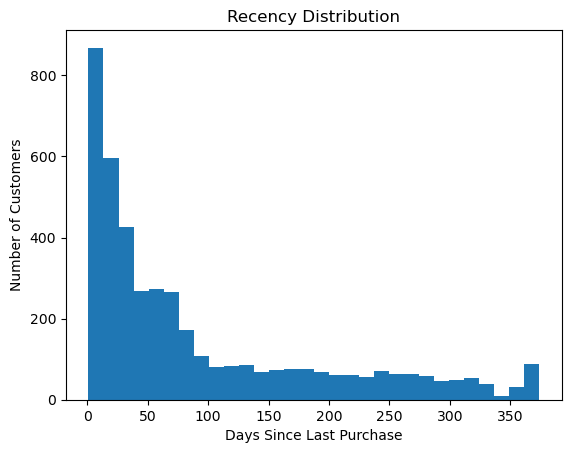

In [132]:
#Recency Distribution
plt.hist(rfm['Recency'], bins=30)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

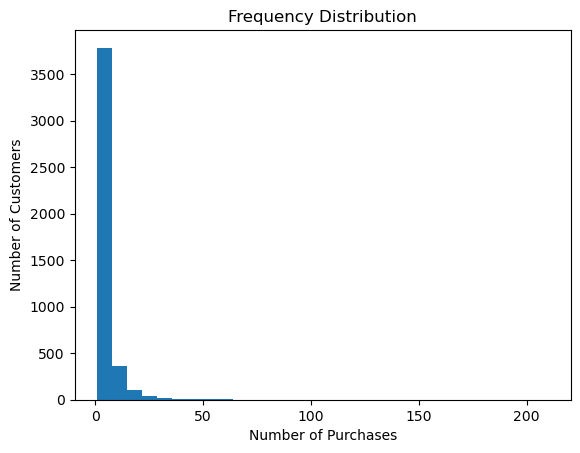

In [134]:
#Frequency Distribution
plt.hist(rfm['Frequency'], bins=30)
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

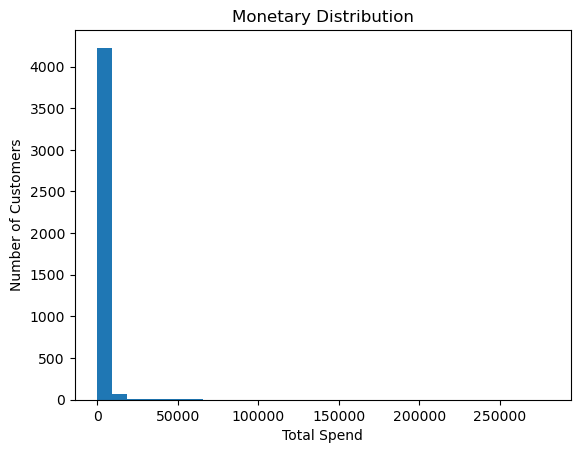

In [136]:
#Monetary Distribution
plt.hist(rfm['Monetary'], bins=30)
plt.title('Monetary Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()

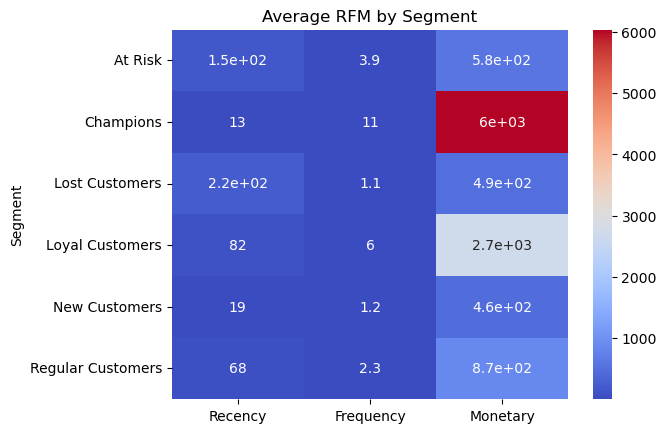

In [138]:
#Heatmap of Average RFM by Segment
import seaborn as sns

segment_analysis = rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean()

sns.heatmap(segment_analysis, annot=True, cmap='coolwarm')
plt.title('Average RFM by Segment')
plt.show()

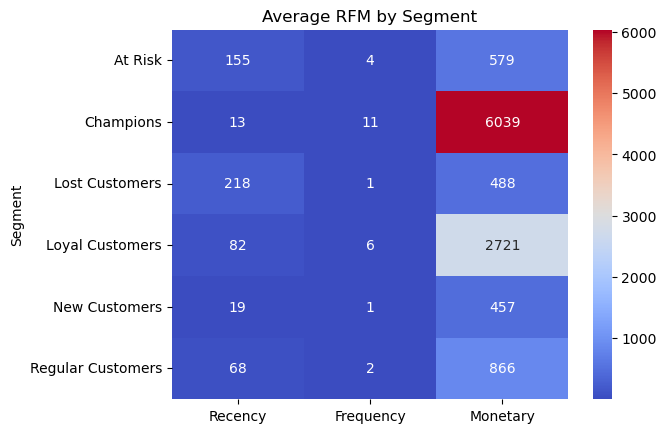

In [140]:
sns.heatmap(segment_analysis, 
            annot=True, 
            fmt='.0f',   # removes scientific notation
            cmap='coolwarm')

plt.title('Average RFM by Segment')
plt.show()


# Applying K-Means Clustering                                                                                                                                                                            


#### Why Apply K-Means After RFM?Because: RFM gives rule-based segmentation, K-Means gives data-driven segmentation, It groups customers automatically based on behavior.

In [143]:
rfm_kmeans = rfm[['Recency','Frequency','Monetary']]

#### Monetary & Frequency are usually skewed.so we're Applying log transformation:
##### Skewness in K-means clustering refers to the lack of symmetry in the distribution of input data, which violates the algorithm's underlying assumption of spherical, normally distributed clusters. Because K-means relies on minimizing the variance (within-cluster sum of squares) and uses distance-based metrics, skewed data or extreme outliers can pull centroids away from the true cluster center, resulting in poor cluster definitions.

In [146]:
import numpy as np

rfm_log = np.log1p(rfm_kmeans)

#### log1p() = log(1 + x)    Safer when values include 0

In [154]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

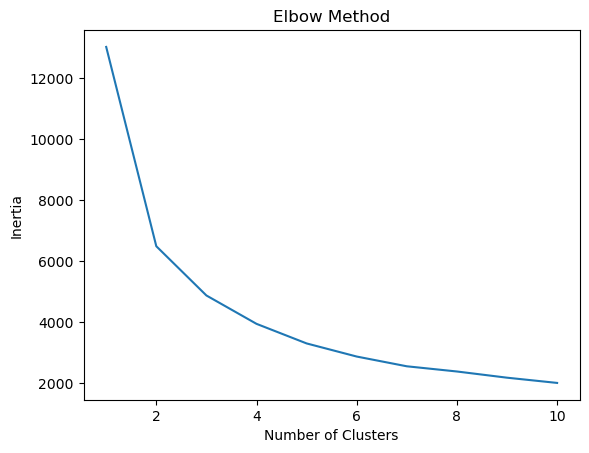

In [156]:
from sklearn.cluster import KMeans

inertia = []
#Elbow Plot
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [158]:
#Silhouette Score
from sklearn.metrics import silhouette_score

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"K={k}, Silhouette Score={score}")


K=2, Silhouette Score=0.43296991873369034
K=3, Silhouette Score=0.3356121569034344
K=4, Silhouette Score=0.33627437675322647
K=5, Silhouette Score=0.3160812218640858
K=6, Silhouette Score=0.3053143353328171
K=7, Silhouette Score=0.3092732145696885
K=8, Silhouette Score=0.2735551324563224
K=9, Silhouette Score=0.27554641011730613
K=10, Silhouette Score=0.27803153683179416


##### Although K=2 had the highest silhouette score, it resulted in very broad segmentation. I selected K=3 to achieve more meaningful customer grouping while maintaining acceptable cluster quality.

In [171]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,12346,326,1,77183.60,1,1,5,115,Lost Customers,0
1,12347,2,7,4310.00,5,5,5,555,Champions,1
2,12348,75,4,1797.24,2,4,4,244,Loyal Customers,0
3,12349,19,1,1757.55,4,1,4,414,New Customers,0
4,12350,310,1,334.40,1,1,2,112,Lost Customers,2


In [173]:
cluster_analysis = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()
cluster_analysis

,Recency,Frequency,Monetary
Cluster,,,
0,44.536326,3.367395,1257.317946
1,17.017972,13.242619,7840.995135
2,167.530798,1.349223,361.346230


In [175]:
rfm['Cluster_Label'] = rfm['Cluster'].map({
    0: 'VIP',
    1: 'Lost',
    2: 'Regular',
    3: 'New'
})

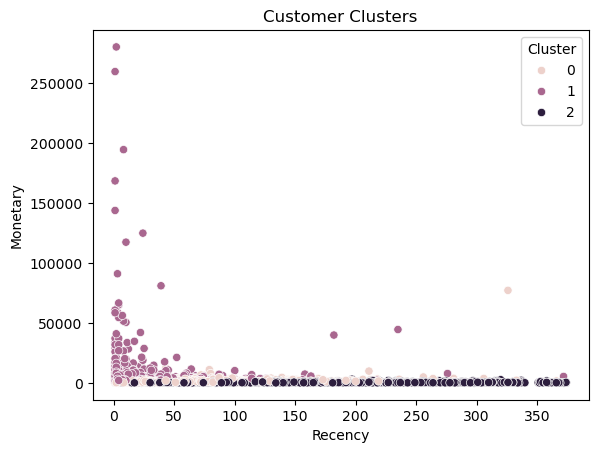

In [177]:
import seaborn as sns

sns.scatterplot(x='Recency', y='Monetary', 
                hue='Cluster', 
                data=rfm)

plt.title('Customer Clusters')
plt.show()

# Churn Prediction Model 
##### churn (or customer/subscriber churn) means the rate at which customers stop doing business with a company, cancel subscriptions, or leave a service over a specific time, indicating lost revenue and potential dissatisfaction; it's a key metric (churn rate) measured as a percentage to understand customer loyalty and retention.

In [211]:
snapshot_date = UCI['InvoiceDate'].max()
rfm['Churn'] = rfm['Recency'].apply(lambda x: 1 if x > 140 else 0)
rfm['Churn'].value_counts()

Churn
0    3246
1    1093
Name: count, dtype: int64

In [213]:
X = rfm[['Recency','Frequency','Monetary']]
y = rfm['Churn']

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [217]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [219]:
#Let's start with logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [221]:
y_pred = model.predict(X_test)

In [223]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[648   0]
 [  2 218]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      0.99      1.00       220

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



In [225]:
#Random Forest usually performs better
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       220

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



In [227]:
rfm['Recency'].describe()

count    4339.000000
mean       92.518322
std       100.009747
min         1.000000
25%        18.000000
50%        51.000000
75%       142.000000
max       374.000000
Name: Recency, dtype: float64

In [230]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [232]:
#saving the final dataset
rfm.to_csv("final_customer_data.csv", index=False)